Author: Rodrigo MM Santiago @rodrigommsantiago

In [ ]:
# Modules...
import numpy as np              # numeric operations
import matplotlib.pyplot as plt # plotting

# Power spectrum functions
from scipy.signal import spectrogram, welch

# Function for loading Matlab data
from scipy.io import loadmat

# Plotting inside notebook
%matplotlib inline 

import pylab as pl          # plot animations
from IPython import display # display tools
from time import sleep      # pausing function

Visualizing a real hippocampal LFP:

In [ ]:
# Reads the ".mat" file
LFP = loadmat('LFP_HG_HFO.mat')

In [ ]:
# Stores the signals into two variables
LFP_HFO = LFP['lfpHFO'][0]
LFP_HG = LFP['lfpHG'][0]
print np.shape(LFP_HFO)
print np.shape(LFP_HG)

In [ ]:
srate = 1000     # sampling rate [Hz]
dt    = 1./srate # sampling interval [s]
t     = np.arange(len(LFP_HFO))*dt # time vector

### Variables for windowing the plot (animation)
# window size
winsize  = 8
# stepsize 
stepsize = srate/8
# max number of steps
maxSteps = int(len(LFP_HFO)*winsize/srate-winsize)

plt.figure(figsize=(12,6))
for winstart in range(maxSteps):
    pl.clf() # clears screen
    plt.ylim([-1.75,1])
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    
    # sample indices in this window
    ind = np.arange(winstart*stepsize,(winstart+winsize)*stepsize+1)
    plt.plot(t[ind],LFP_HG[ind])
    plt.plot(t[ind],LFP_HFO[ind]-1)
    plt.xlim([min(t[ind]),max(t[ind])])
    plt.xticks(np.linspace(min(t[ind]),max(t[ind]),3))
    display.display(pl.gcf())       # shows the plot inside the animation
    display.clear_output(wait=True) # holds display until the next plot

Reviewing *welch* function for PSD computation:

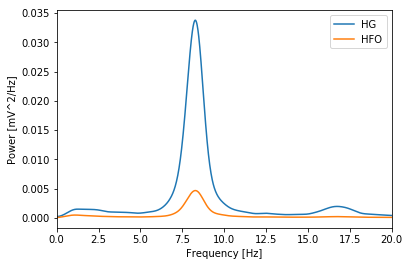

In [ ]:
win  = 2.*srate # window length [s]
nfft = 2**16    # frequency resolution

F,Pxx1 = welch(LFP_HG,srate,nperseg=win,nfft=nfft)
F,Pxx2 = welch(LFP_HFO,srate,nperseg=win,nfft=nfft)

plt.plot(F,Pxx1,label='HG')
plt.plot(F,Pxx2,label='HFO')
plt.xlim([0,20])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [mV^2/Hz]')
plt.legend();

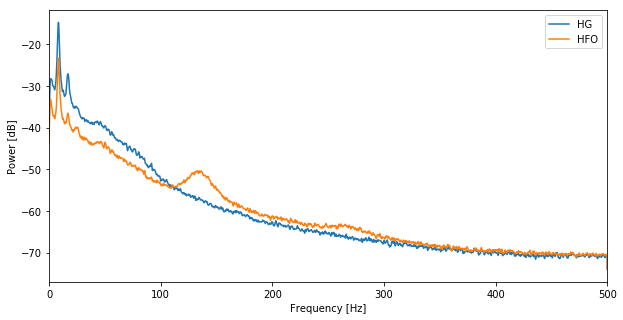

In [ ]:
# Log-scaled plot
plt.figure(figsize=(10,5))
plt.plot(F,10*np.log10(Pxx1),label='HG')
plt.plot(F,10*np.log10(Pxx2),label='HFO')
plt.xlim([0,500])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.legend();

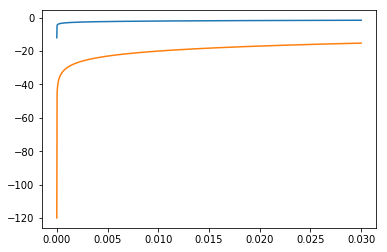

In [ ]:
x = np.linspace(0.000000000001,0.03,1000)
y1 = np.log10(x)
y2 = 10*np.log10(x)
plt.plot(x,y1)
plt.plot(x,y2)

Power spectral density of an artificial signal:



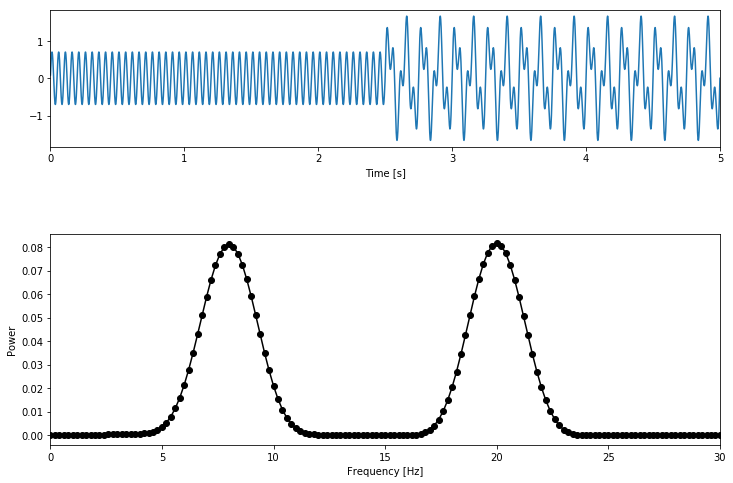

In [ ]:
srate = 1000.
dt = 1./srate
t = np.arange(dt,5.00001,dt)

LFP = np.sin(2*np.pi*8*t)
LFP[:2500] = 0
LFP = LFP + 0.7*np.sin(2*np.pi*20*t)

plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=2)
ax1.plot(t,LFP)
ax1.set_xlabel('Time [s]')
ax1.set_xlim([0,5])

win = 0.5*srate
overlap = 0.5*win
nfft = 5000

F,Pxx = welch(LFP,srate,nperseg=win,noverlap=overlap,nfft=nfft)

ax2 = plt.subplot2grid((6,1),(3,0),rowspan=3)
ax2.plot(F,Pxx,'ko-')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Power')
ax2.set_xlim([0,30]);

Time-resolved power spectral density (TFD - *Time-Frequency Density*):

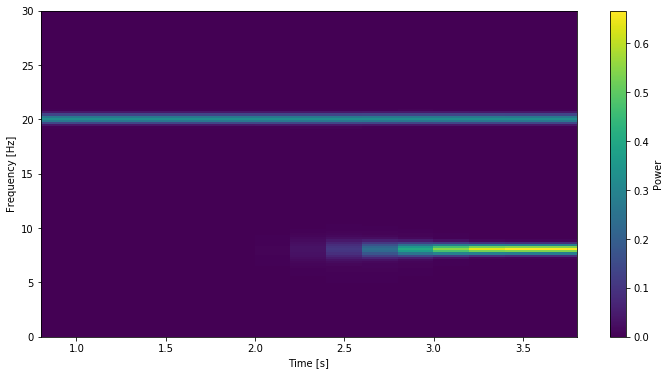

In [ ]:
windowlen = int(2.*srate)      # window length
stepsize  = int(0.1*windowlen) # percentage of overlapping
Nwindows  = int((len(LFP)-windowlen)/stepsize+1)

T = np.empty(Nwindows)
TFD = np.empty((Nwindows,len(t)/2+1))
for nwin in range(Nwindows):
    winsample = np.arange(windowlen) + (nwin-1)*stepsize
    F,Pxx = welch(LFP[winsample],fs=srate,nperseg=windowlen,nfft=nfft)
    T[nwin] = t[int(winsample[int(windowlen/2)])]
    TFD[nwin,:] = Pxx 

plt.figure(figsize=(12,6))
plt.pcolormesh(T,F,TFD.T)
plt.ylim([0,30])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power');

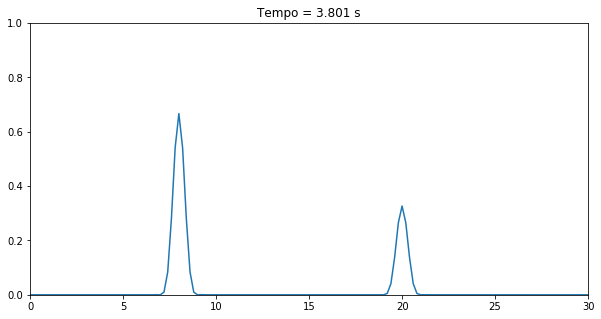

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

for nwin in range(Nwindows):
    pl.clf()
    plt.plot(F,TFD[nwin,:])
    plt.xlim([0,30])
    plt.ylim([0,1])
    plt.title('Time = '+str(T[nwin])+' s')
    display.display(pl.gcf())
    display.clear_output(wait=True)

Usando a função *spectrogram*:

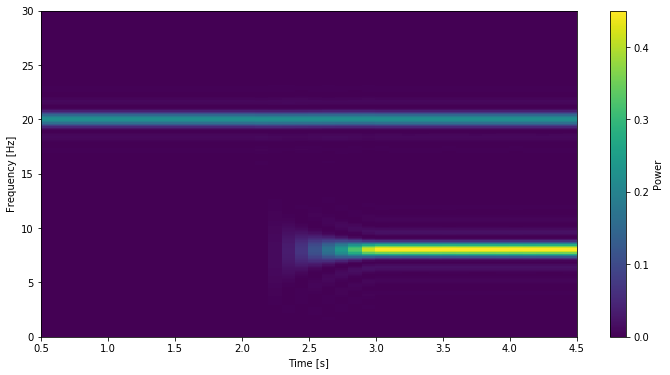

In [ ]:
window_length = 1*srate
overlap = 0.9*window_length
nfft = 2**13

F,T,Sxx = spectrogram(LFP,srate,nperseg=int(window_length),noverlap=overlap,nfft=nfft)

plt.figure(figsize=(12,6))
plt.pcolormesh(T,F,Sxx)
plt.ylim([0,30])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power');

Normalizations:

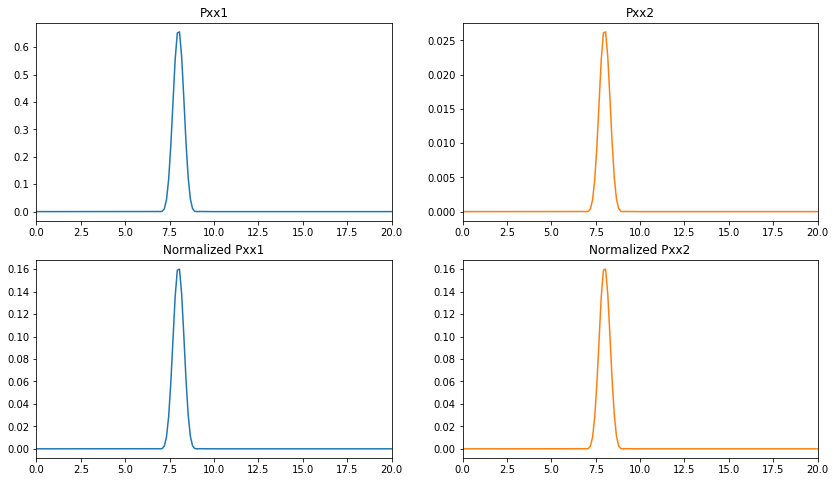

In [ ]:
win     = 2*srate
LFP1    = np.sin(2*np.pi*8*t)
LFP2    = 0.2*LFP1

F,Pxx1 = welch(LFP1,srate,nperseg=win,nfft=nfft)
F,Pxx2 = welch(LFP2,srate,nperseg=win,nfft=nfft)

NormPxx1 = Pxx1/np.sum(Pxx1)
NormPxx2 = Pxx2/np.sum(Pxx2)

plt.figure(figsize=(14,8))

plt.subplot(221)
plt.plot(F,Pxx1,'C0')
plt.xlim([0,20])
plt.title('Pxx1')

plt.subplot(223)
plt.plot(F,NormPxx1,'C0')
plt.xlim([0,20])
plt.title('Normalized Pxx1')

plt.subplot(222)
plt.plot(F,Pxx2,'C1')
plt.xlim([0,20])
plt.title('Pxx2')

plt.subplot(224)
plt.plot(F,NormPxx2,'C1')
plt.xlim([0,20])
plt.title('Normalized Pxx2');

TFD normalization using a baseline activity as reference

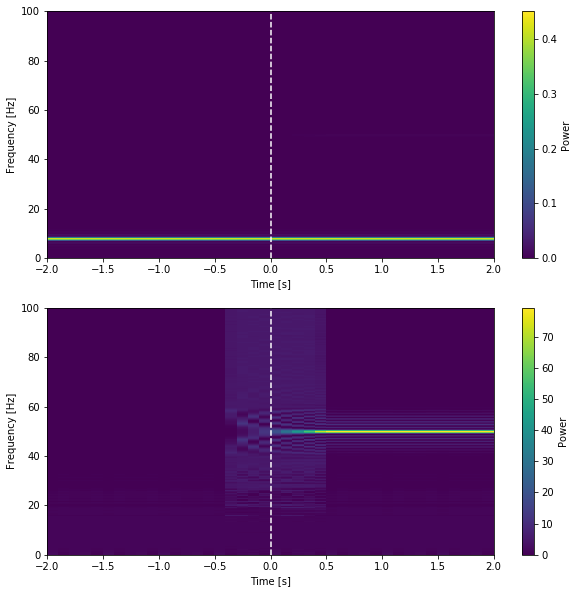

In [ ]:
srate = 1000.
dt = 1./srate
t = np.arange(dt,5.00001,dt)

LFP = np.sin(2*np.pi*8*t)
LFP[2500:] = LFP[2500:]+0.1*np.sin(2*np.pi*50*t[2500:])

window_length = int(1*srate)
overlap = 0.9*window_length
nfft = 2**13

F,T,TFD = spectrogram(LFP,srate,nperseg=window_length,noverlap=overlap,nfft=nfft)

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.pcolormesh(T-2.5,F,TFD)
plt.plot([0,0],[0,100],'w--')
plt.ylim([0,100])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power')

### Normalization by baseline
I = T<2.5
Pbaseline = np.mean(TFD[:,I],1)
Pbaseline = np.reshape(Pbaseline,(len(Pbaseline),1))
NormTFD = TFD/np.repeat(Pbaseline,np.shape(TFD)[1],1)

plt.subplot(212)
plt.pcolormesh(T-2.5,F,NormTFD)
plt.plot([0,0],[0,100],'w--')
plt.ylim([0,100])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power');

Theta power trough time:

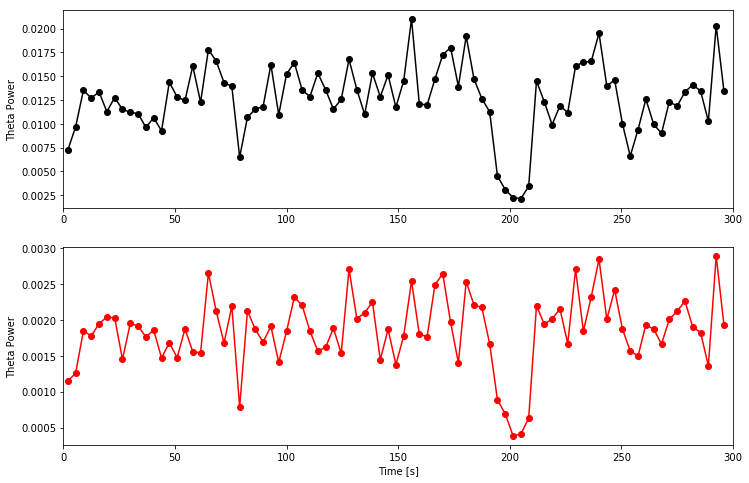

In [ ]:
srate = 1000     # sampling rate [Hz]
dt    = 1./srate # sampling interval [s]
t     = np.arange(len(LFP_HFO))*dt # time vector

F,T,TFD1 = spectrogram(LFP_HG,srate,nperseg=4*srate,nfft=nfft)
F,T,TFD2 = spectrogram(LFP_HFO,srate,nperseg=4*srate,nfft=nfft)

Itheta = (F>6)*(F<10)
ThetaPower1 = np.mean(TFD1[Itheta],0)
ThetaPower2 = np.mean(TFD2[Itheta],0)

plt.figure(figsize=(12,8))

plt.subplot(211)
plt.plot(T,ThetaPower1,'ko-')
plt.ylabel('Theta Power')
plt.xlim([0,300])

plt.subplot(212)
plt.plot(T,ThetaPower2,'ro-')
plt.xlabel('Time [s]')
plt.ylabel('Theta Power')
plt.xlim([0,300]);